How well do jobs and skills pay for Data Analysts?

Methology 

    1. Evaluate median salary for top 6data jobs
    2. Find median salary per skill for Data Analysts
    3. Visualize for highest paying skills and most demanded skills

In [15]:
# Importing Libararies
import ast
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df =dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and pd.notnull(x) else x)

In [16]:
# filter for the jobh titles and country
df_CA =df[(df['job_country'] == 'Canada')].dropna(subset=['salary_year_avg'])

In [17]:
job_titles =df_CA['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Engineer',
 'Senior Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Software Engineer',
 'Data Analyst']

In [18]:
df_CA_top6 = df_CA[df_CA['job_title_short'].isin(job_titles)]

In [19]:
job_order = df_CA_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Machine Learning Engineer', 'Senior Data Engineer',
       'Software Engineer', 'Data Scientist', 'Data Engineer', 'Data Analyst'],
      dtype='object', name='job_title_short')

<function matplotlib.pyplot.show(close=None, block=None)>

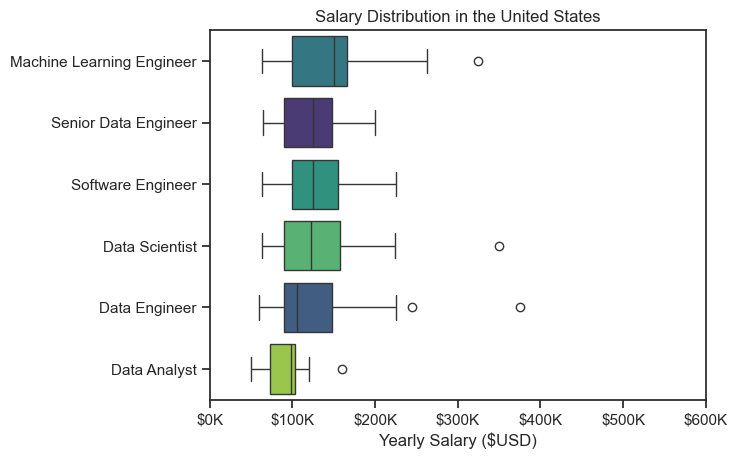

In [20]:
sns.boxplot(data=df_CA_top6, x='salary_year_avg', y='job_title_short', order=job_order, palette='viridis', hue='job_title_short', dodge=False)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show

Investigate Median Salary Vs Skill for Data Analysts

In [21]:
df_DA_CA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Canada')].copy()

df_DA_CA = df_DA_CA.dropna(subset=['salary_year_avg'])

df_DA_CA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
48811,Data Analyst,"Data Analyst, End to End Banking Operations","Edmonton, AB, Canada",via Ai-Jobs.net,Full-time,False,Canada,2023-06-30 06:13:33,False,False,Canada,year,105000.0,NaN,ATB Financial,"[sql, python, javascript, bigquery, tableau, s...","{'analyst_tools': ['tableau', 'sheets'], 'clou..."
59599,Data Analyst,Data Architect,Anywhere,via Motion Recruitment,Full-time,True,Canada,2023-07-18 06:35:18,True,False,Canada,year,120000.0,NaN,Motion Recruitment,"[sql, snowflake, aws, gcp, azure, redshift, bi...","{'analyst_tools': ['tableau'], 'cloud': ['snow..."
142010,Data Analyst,Analytics Lab Architect,Canada,via Ladders,Full-time,False,Canada,2023-12-24 08:20:10,True,False,Canada,year,101014.0,NaN,Swiss Re,"[azure, databricks]","{'cloud': ['azure', 'databricks']}"
202712,Data Analyst,Data Analyst - HoYolab and Content Creator,Canada,via Ai-Jobs.net,Full-time,False,Canada,2023-07-05 22:12:02,True,False,Canada,year,100500.0,NaN,HoYoverse,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
238284,Data Analyst,"Data Analyst, Risk User Experience",Canada,via Ai-Jobs.net,Full-time,False,Canada,2023-09-04 07:16:18,False,False,Canada,year,111175.0,NaN,Stripe,"[sql, python, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
262031,Data Analyst,Full-time / Financial Data Analyst (Remote),Anywhere,via LinkedIn,Full-time,True,Canada,2023-05-18 07:02:41,False,False,Canada,year,60000.0,NaN,eStaffing Inc.,None,None
351717,Data Analyst,Data Analyst,Anywhere,via Remote OK,Full-time,True,Canada,2023-12-18 23:11:07,True,False,Canada,year,82750.0,NaN,Luxury Presence,None,None
358363,Data Analyst,Data Analyst 2,Canada,via Ai-Jobs.net,Full-time,False,Canada,2023-07-04 23:10:40,False,False,Canada,year,99150.0,NaN,Zynga,"[sql, python, hadoop, spark, express, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
396688,Data Analyst,"Data Analyst, Growth",Canada,via Ai-Jobs.net,Full-time,False,Canada,2023-04-12 18:31:24,False,False,Canada,year,111175.0,NaN,Stripe,"[sql, python, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
399340,Data Analyst,Power BI Engineer,"Calgary, AB, Canada",via LinkedIn,Full-time,False,Canada,2023-11-30 18:13:37,True,False,Canada,year,65000.0,NaN,LTIMindtree,"[sql, power bi]","{'analyst_tools': ['power bi'], 'programming':..."


In [22]:
df_DA_CA = df_DA_CA.explode('job_skills')

df_DA_CA = df_DA_CA[['salary_year_avg', 'job_skills']]

df_DA_CA

,salary_year_avg,job_skills
48811,105000.0,sql
48811,105000.0,python
48811,105000.0,javascript
48811,105000.0,bigquery
48811,105000.0,tableau
...,...,...
767858,100500.0,python
767858,100500.0,sas
767858,100500.0,sas
767858,100500.0,excel


In [28]:
df_DA_Top_Pay = df_DA_CA.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values('median', ascending=False)
df_DA_Top_Pay = df_DA_Top_Pay.head(10)
df_DA_Top_Pay

,count,median
job_skills,,
looker,2,130250.00
snowflake,3,120000.00
redshift,1,120000.00
hadoop,3,111175.00
spark,4,109795.25
typescript,1,108415.50
bigquery,3,105000.00
aws,2,105000.00
gcp,2,105000.00


In [33]:
df_DA_skills = df_DA_CA.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values('count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
hadoop,3,111175.00
spark,4,109795.25
python,14,99825.00
sheets,4,99500.00
sql,17,99150.00
tableau,10,98825.00
excel,9,98500.00
sas,8,98500.00
vba,4,84500.00


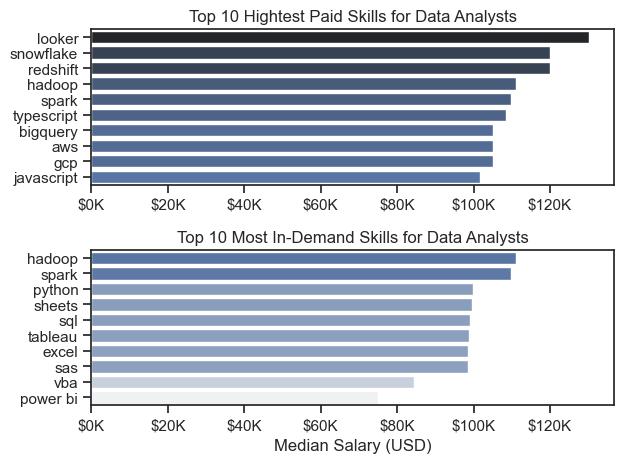

In [34]:

# Top 10 Highest Paid Skills for Data Analysts
fig, ax = plt.subplots(2,1)

sns.set_theme(style="ticks")
#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
sns.barplot(data=df_DA_Top_Pay, x='median', y=df_DA_Top_Pay.index, ax=ax[0], hue='median', palette='dark:b_r')


ax[0].set_title('Top 10 Hightest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()

sns.set_theme(style="ticks")
#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1],hue='median', palette='light:b')


ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()

fig.tight_layout()
plt.show()